<a href="https://colab.research.google.com/github/sravani3075/sravani3075/blob/main/Disease_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAY 1 : Machine learning BASICS AND Data Preprocessing

In [1]:
from google.colab  import files
files.upload()

Saving kaggle.json.json to kaggle.json.json


{'kaggle.json.json': b'{"username":"tsravani09","key":"a3ccc83c3245e35345a6acf33ca28b18"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json.json

In [3]:
!pip install kaggle

In [4]:
import pandas as pd
df = pd.read_csv('/content/heart diease dataset.zip')

In [5]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [7]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [8]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

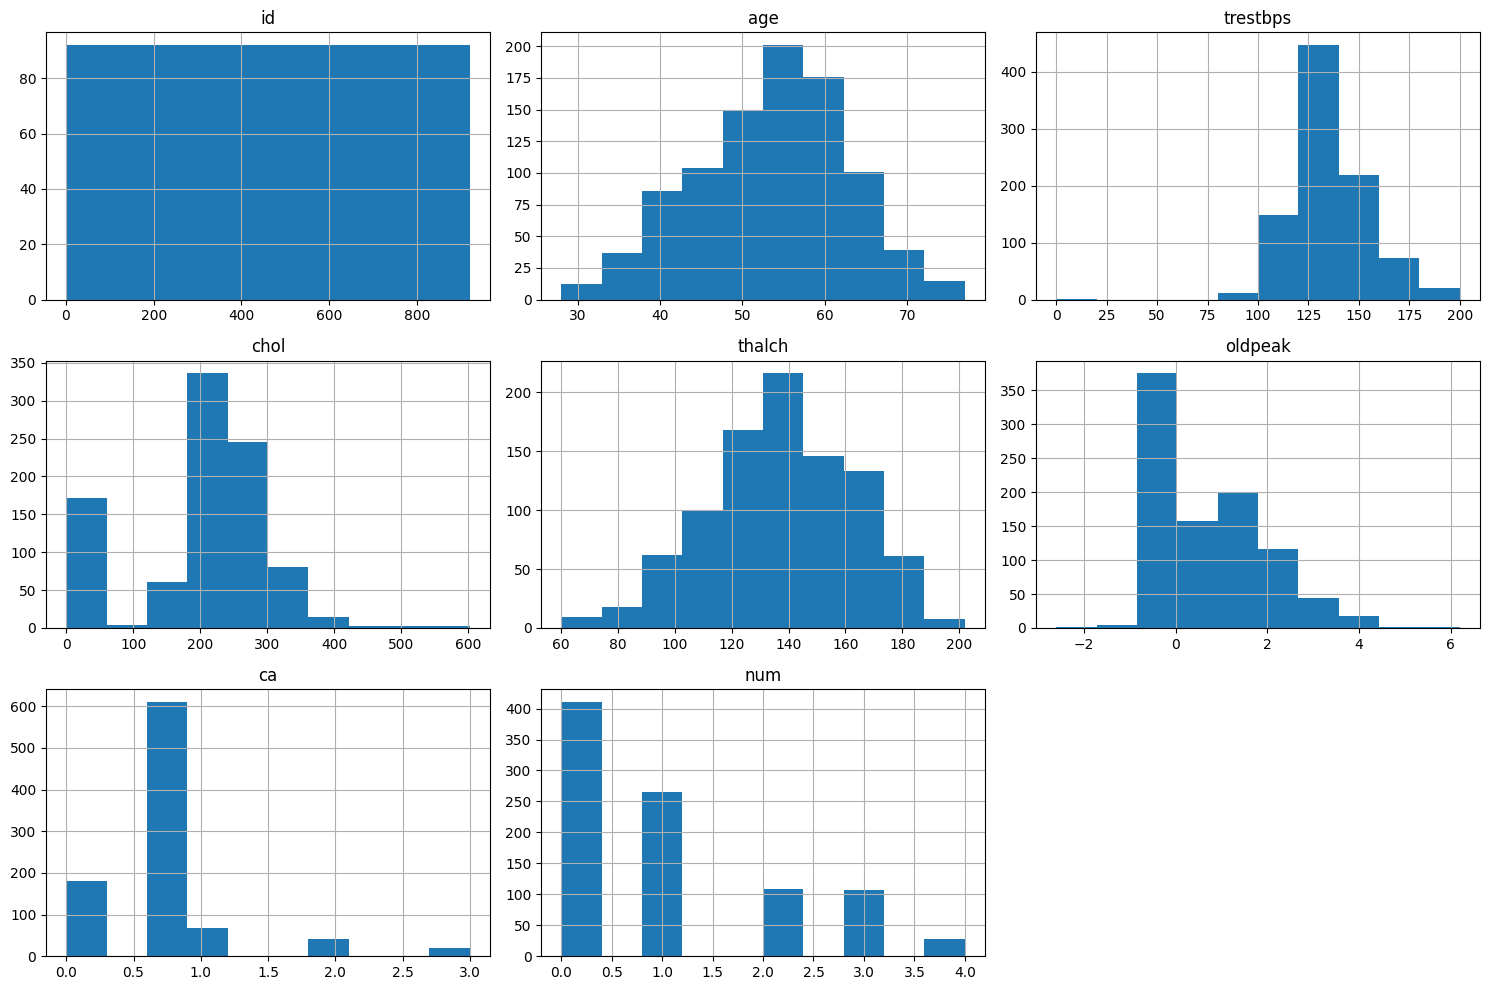

In [10]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

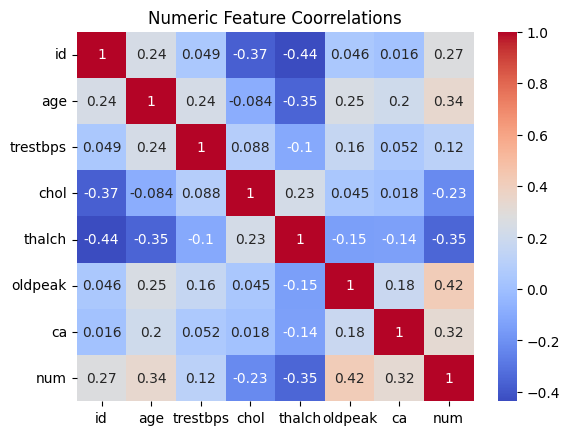

In [11]:
sns.heatmap(df[numeric_cols].corr(),annot=True, cmap='coolwarm')
plt.title('Numeric Feature Coorrelations')
plt.show()


DAY 2: MODEL TRANING EVALUATION

In [12]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')


In [13]:
X = df.drop('num', axis=1)
Y = (df['num'] > 0).astype(int)

In [14]:
X = pd.get_dummies(X, columns=cat_cols)
print("Final feature columns:", X.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


Day 3: Train/Test Spilt, Normalization, Modeling and Model Evaluation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

new value = (x=mean)/standard deviation

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression  #its about classification

In [19]:
lr_model = LogisticRegression() #giving admission to a new student
lr_model.fit(X_train, Y_train) #traning step

LogisticRegression()

Model Evaluation


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_lr))
print(classification_report(Y_test, y_pred_lr))

Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Accracy score-75 to 98 considered to be good

DAY-4:Random Forest and feature importance

In [24]:
from sklearn.metrics import confusion_matrix

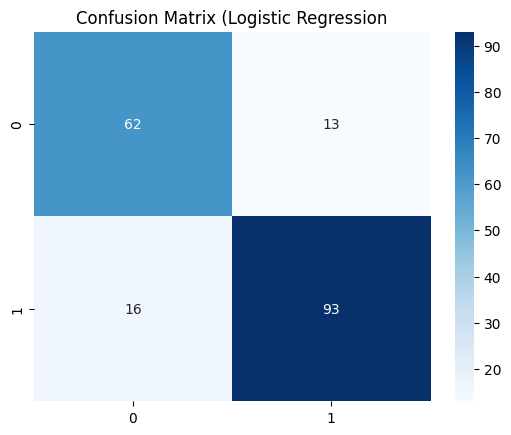

In [27]:
cm = confusion_matrix(Y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


Feature importance

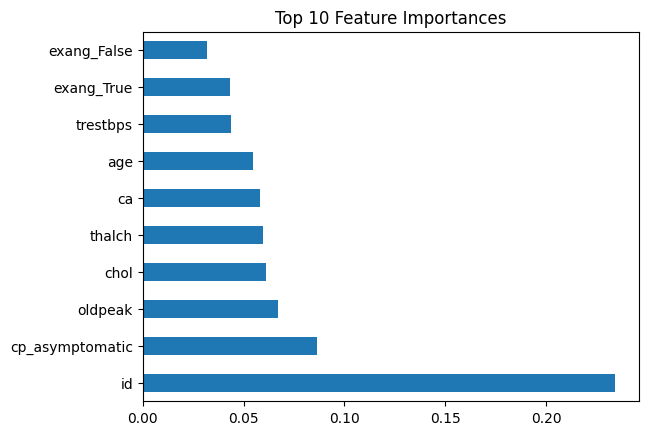

In [38]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()


save the model

In [39]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')

['heart_scaler.pkl']

In [40]:
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [49]:
sample = X.head(1)
sample.to_csv("Heart_user_template.csv", index=False)
print("user template saved as 'Heart_user_template.csv' ")


user template saved as 'Heart_user_template.csv' 


DAY-5:USER UPLOAD & PREDICTION

In [55]:
from google.colab import files
uploaded = files.upload()

Saving heart diease dataset (1).zip to heart diease dataset (1) (1).zip


In [61]:
import joblib
import pandas as pd
user_df = pd.read_csv('/content/heart diease dataset.zip')

#getting columns list from tranning dataset
numeric_cols = user_df.select_dtypes(include='number').columns.tolist()
cat_cols = user_df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

#droping columns which are extra in user_df than required to avoid error
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_cols]
#fill the missing numeric column & cat column
user_df[numeric_cols]=user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
  user_df[col]=user_df[col].fillna('unknown')

for col in bool_cols:
  user_df[col]=user_df[col].astype(int)
#one-hot encoding cat columns
user_df_encode=pd.get_dummies(user_df, columns=cat_cols)

#allign columns
user_df_encode = user_df_encode.reindex(columns=X.columns, fill_value=0)

#scale the data
scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encode)

#prediction
model = joblib.load('heart_rf_model.pkl')
prediction = model.predict(user_df_scaled)
user_df['Heart_Disease_Prediction'] =prediction

#show result
print(user_df)

      id  age     sex        dataset               cp    trestbps   chol  \
0      1   63    Male      Cleveland   typical angina  145.000000  233.0   
1      2   67    Male      Cleveland     asymptomatic  160.000000  286.0   
2      3   67    Male      Cleveland     asymptomatic  120.000000  229.0   
3      4   37    Male      Cleveland      non-anginal  130.000000  250.0   
4      5   41  Female      Cleveland  atypical angina  130.000000  204.0   
..   ...  ...     ...            ...              ...         ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   
916  917   62    Male  VA Long Beach   typical angina  132.132404  139.0   
917  918   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   
918  919   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   
919  920   62    Male  VA Long Beach  atypical angina  120.000000  254.0   

       fbs           restecg      thalch    exang   oldpeak        slope  \
0     True 